<a href="https://colab.research.google.com/github/votamvan/cs582/blob/master/ML_Project1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS582 Machine Learning - Project 1
Professor: Mohamed Abdelrazik

Team:
*   Tam Van Vo - 610746
*   Quynh Pham - 610716
*   Samsher Bahadur Rana - 611060
*   Van Vong Tran - 610772
*   Yared Geberetsadik Beyene - 110466

Project Colab URL: https://colab.research.google.com/drive/1iqL0DPrwJ2okp3muu7IZ-pl4RKnbMr-1

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Ref of EDA:https://www.dataquest.io/blog/kaggle-getting-started/

***Only reference on EDA section, the rest are done by team manually


# Install auto-sklearn

In [0]:
# !apt-get install swig -y
# !pip install Cython numpy
# !pip install auto-sklearn


#Load all libs




In [0]:
from random import randrange
import numpy as np
import seaborn as sns
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 1: Data Loading

In [0]:
!git clone https://github.com/votamvan/cs582.git

Cloning into 'cs582'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 1), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [0]:
#from google.colab import files
#uploaded = files.upload()
df_train = pd.read_csv('/content/cs582/data/house-prices/train.csv')
df_test = pd.read_csv('/content/cs582/data/house-prices/test.csv')
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
551,552,20,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1957,1957,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,308,Unf,0,620,928,GasA,...,Y,FuseA,928,0,0,928,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,Fin,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,112500
1343,1344,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,896,896,GasA,...,Y,SBrkr,1172,741,0,1913,0,0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2,342,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,177000
383,384,45,RH,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1.5Unf,6,3,1928,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,Fa,No,Unf,0,Unf,0,784,784,GasA,...,N,FuseA,784,0,0,784,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,360,Fa,Fa,N,0,0,91,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,76000
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,...,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1026,1027,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1960,1960,Gable,CompShg,MetalSd,HdBoard,BrkFace,324.0,TA,TA,CBlock,TA,TA,No,Rec,697,Unf,0,571,1268,GasA,...,Y,SBrkr,1264,0,0,1264,1,0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1960.0,Unf,2,461,TA,TA,Y,0,0,0,0,143,0,NaN,NaN,NaN,0,4,2010,WD,Normal,167500


# Step 2: EDA

# SalePrice

SalePrice Skew =  1.8828757597682129


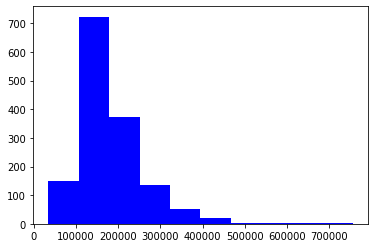

In [0]:
print ("SalePrice Skew = ", df_train.SalePrice.skew())
ax = plt.hist(df_train.SalePrice, color='blue')

SalePrice Skew is: 0.12133506220520406


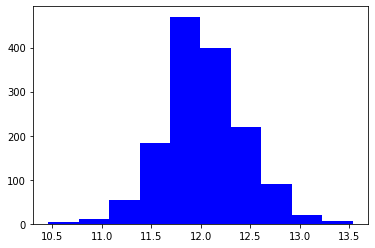

In [0]:
target = np.log(df_train.SalePrice)
print ("SalePrice Skew is:", target.skew())
ax = plt.hist(target, color='blue')

# Handle Numerical Data

In [0]:
numeric_features = df_train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Correlation with SalePrice")
print (corr['SalePrice'].sort_values(ascending=False)[:5])
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

Correlation with SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The median sales price strictly increases as Overall Quality increases.


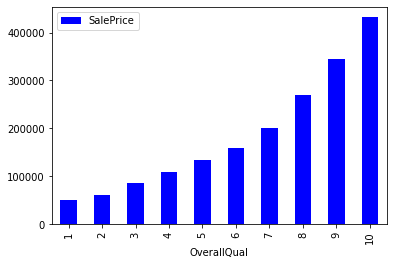

In [0]:
quality_pivot = df_train.pivot_table(index='OverallQual', 
                                     values='SalePrice', aggfunc=np.median)
ax = quality_pivot.plot(kind='bar', color='blue')
print("The median sales price strictly increases as Overall Quality increases.")

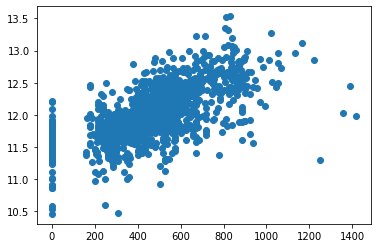

In [0]:
ax = plt.scatter(x=df_train['GarageArea'], y=target)

Remove outliers


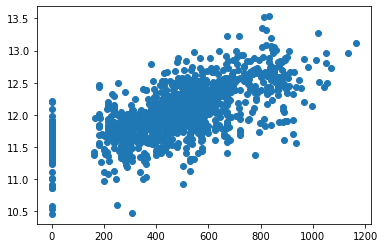

In [0]:
print('Remove outliers')
df_train = df_train[df_train['GarageArea'] < 1200]
target = np.log(df_train.SalePrice)
ax = plt.scatter(x=df_train['GarageArea'], y=target)

#Handle non-numerial data

```
'Street','Alley'
'Grvl':0, 'Pave':1,'NA':-1

'LotShape'
'Reg':3,'IR1':2,'IR2':1,'IR3':0

'LandContour'
'Lvl':1,'Bnk':0,'Low':0,'HLS':0

'Utilities'
'AllPub': 3,'NoSewr': 2,'NoSeWa': 1,'ELO':0

'BsmtFinType1','BsmtFinType2','GarageFinish'
'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0, 'RFn':1,'Fin':2

'PavedDrive'
'N':0,'Y':1,'P':0.5

'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC'
'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'NA':-1, 'Po':0, 'No':0,'Mn':1,'Av':2

'CentralAir'
'N':0,'Y':1
```



In [0]:
def ranking_features(df,feature,di):
  for feature in features:       
      df[feature].replace(di, inplace=True)
      df[feature]=df[feature].fillna(-1)
  return df
di = {'Grvl':0, 'Pave':1,'NA':-1,'Reg':3,'IR1':2,'IR2':1,
      'IR3':0,'Lvl':1,'Bnk':0,'Low':0,'HLS':0,'AllPub': 3,
      'NoSewr': 2,'NoSeWa': 1,'ELO':0,'GLQ':5,'ALQ':4,'BLQ':3,
      'Rec':2,'LwQ':1,'Unf':0, 'RFn':1,'Fin':2,'N':0,'Y':1,
      'P':0.5,'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Po':0, 'No':0,'Mn':1,'Av':2}
features = ['Street','Alley','LotShape','LandContour','Utilities','BsmtFinType1',
            'BsmtFinType2','GarageFinish','PavedDrive','ExterQual','ExterCond',
            'BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu',
            'GarageQual','GarageCond','PoolQC','CentralAir']
df_train = ranking_features(df_train,features,di)
df_test = ranking_features(df_test,features,di)

Encode Street data


1    1450
0       5
Name: enc_street, dtype: int64


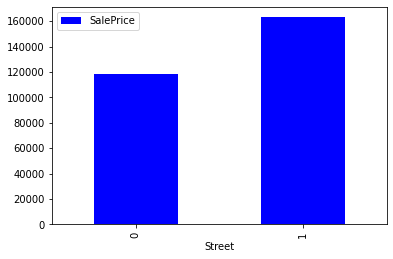

In [0]:
street_pivot = df_train.pivot_table(index='Street', 
                                    values='SalePrice', aggfunc=np.median)
ax = street_pivot.plot(kind='bar', color='blue')
df_train['enc_street'] = pd.get_dummies(df_train.Street, drop_first=True)
df_test['enc_street'] = pd.get_dummies(df_test.Street, drop_first=True)
print (df_train.enc_street.value_counts())

Encode SaleCondition

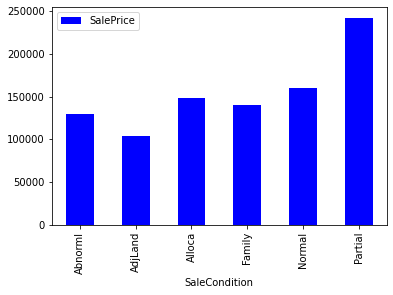

In [0]:
condition_pivot = df_train.pivot_table(index='SaleCondition', 
                                       values='SalePrice', aggfunc=np.median)
ax = condition_pivot.plot(kind='bar', color='blue')

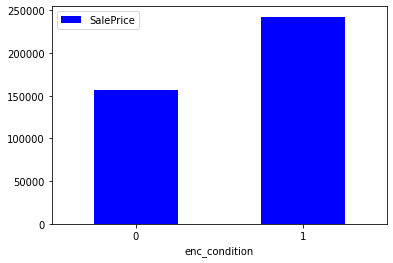

In [0]:
def encode(x):
 return 1 if x == 'Partial' else 0
df_train['enc_condition'] = df_train.SaleCondition.apply(encode)
df_test['enc_condition'] = df_test.SaleCondition.apply(encode)
condition_pivot = df_train.pivot_table(index='enc_condition', 
                                       values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
ax = plt.xticks(rotation=0)

# Handle null data

In [0]:
def unique_nullcount(df):
  rows = []
  for (i, j) in df.iteritems(): 
      rows.append([i, df_train[i].nunique(), df_train[i].isna().sum()])
  df = pd.DataFrame(rows, columns=["Feature", "Unique value","Count null"])
  .sort_values(["Unique value","Count null"], ascending = (True,True))
  pd.set_option('display.max_rows', df.shape[0]+1)
  return df

def unique_value_list(df,feature, ct):
  features = df[df[feature] < ct]['Feature']
  for i in features: 
      print(i, df_train[i].unique())


In [0]:
df = unique_nullcount(df_train.select_dtypes(include=[np.number]))
print(df[df['Count null']>0])

        Feature  Unique value  Count null
41  GarageYrBlt            97          81
2   LotFrontage           110         258
13   MasVnrArea           325           8


In [0]:
df_train.LotFrontage=df_train.LotFrontage.fillna(0.0)
df_train.MasVnrArea=df_train.MasVnrArea.fillna(0.0)
df_train.GarageYrBlt=df_train.GarageYrBlt.fillna(df_train.GarageYrBlt.mode()[0])

df_test.LotFrontage=df_test.LotFrontage.fillna(0.0)
df_test.MasVnrArea=df_test.MasVnrArea.fillna(0.0)
df_test.GarageYrBlt=df_test.GarageYrBlt.fillna(df_test.GarageYrBlt.mode()[0])

In [0]:
df = unique_nullcount(df_train.select_dtypes(include=[np.number]))
print(df[df['Count null']>0])

Empty DataFrame
Columns: [Feature, Unique value, Count null]
Index: []


# Step 3: Data Preparation

#Finalize dataset


In [0]:
from sklearn.model_selection import train_test_split
data = df_train.select_dtypes(include=[np.number]).interpolate().dropna()
X_all = data.drop(['SalePrice', 'Id'], axis=1)
y_all = np.log(df_train.SalePrice)
mean_y = np.mean(y_all)
y_all[y_all <= mean_y] = 0
y_all[y_all > mean_y] = 1
y_all = y_all.astype(int)
# Standardization of datasets
X,y=X_all, y_all
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X, X_test, y, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Step 4: Choose Model
1. Get best estimator
2. Training Curve and Validation Curve 

#General Functions

In [0]:
from sklearn.model_selection import GridSearchCV
def best_estimator(estimator,tuned_parameters,X,y,cv):
  grid = GridSearchCV(estimator, tuned_parameters, 
                      cv = cv, scoring = 'accuracy', n_jobs=-1)
  grid.fit(X,y)
  best_estimator = grid.best_estimator_
  print(f'Best score: {grid.best_score_}')
  print(grid.best_estimator_)
  return best_estimator

In [0]:
#show complexity curve (validation curve) and learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
def plot_learning_curve(estimator, title, X, y, ax=None, 
                        cv=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    if ax is None: _, ax = plt.subplots(figsize=(20, 5))
    ax.set_title(title+' Learning Curve')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    return plt
def plot_validation_curve(estimator, title, X, y, ax=None, cv=None, param_name=None, param_range=None):
    if ax is None: _, ax = plt.subplots(figsize=(20, 5))
    ax.set_title(title+' Validation Curve')
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, 
                                                 param_range=param_range, 
                                                 scoring="accuracy", cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
    ax.grid()
    ax.semilogx(param_range, train_scores_mean, 'o-', color="r", label="Training score")
    ax.fill_between(param_range, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.semilogx(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.fill_between(param_range, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.legend(loc="best")
    ax.set_xlabel(param_name)
    ax.set_ylabel("Score")
    return plt


def show_TV_curve(estimator, title, X,y, param_name, param_range, cv) :  
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
  plot_learning_curve(estimator, title, X, y, ax=ax1, cv=cv)
  plot_validation_curve(estimator, title, X, y, ax=ax2, cv=cv, 
                        param_name=param_name, param_range=param_range)
  plt.show()

# 1/ KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
weight_options = ["uniform", "distance"]
k_range = np.arange(1,30)
tuned_parameters = dict(n_neighbors = k_range, weights = weight_options)
knn_estimator = best_estimator(KNeighborsClassifier(), tuned_parameters,X,y,10)

Best score: 0.9020630710285881
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')


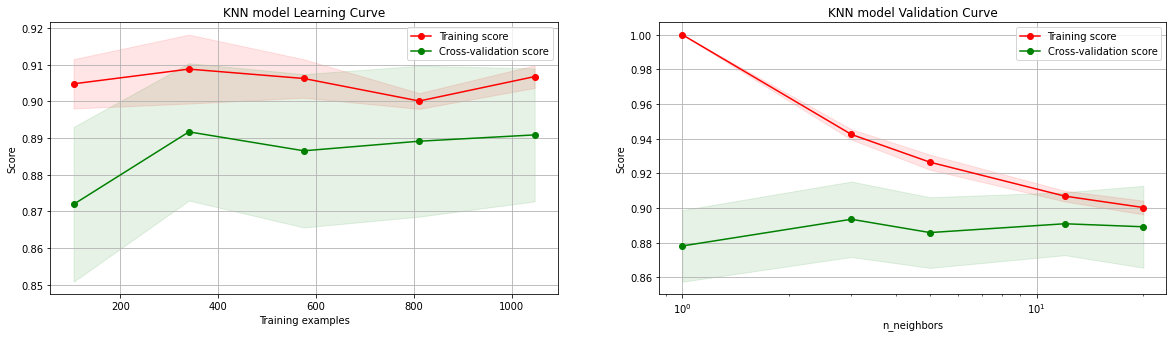

In [0]:
param_range = [1,3,5,12,20]
show_TV_curve(KNeighborsClassifier(12),'KNN model',X,y,'n_neighbors',param_range,10)


From the Validation Curve, by increasing the n_neighbors value we getting better training score and CV score. But after n_neighbors> 12, the curves going down. So after this point if we increasing the k doesn't improve the model


# 2/ SVC

In [0]:
from sklearn.svm import LinearSVC
tuned_parameters = {
    'C': [0.001, 0.1, 1, 10, 100]
}
svc_estimator = best_estimator(LinearSVC(), tuned_parameters,X,y,5)

Best score: 0.9192430072517389
LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


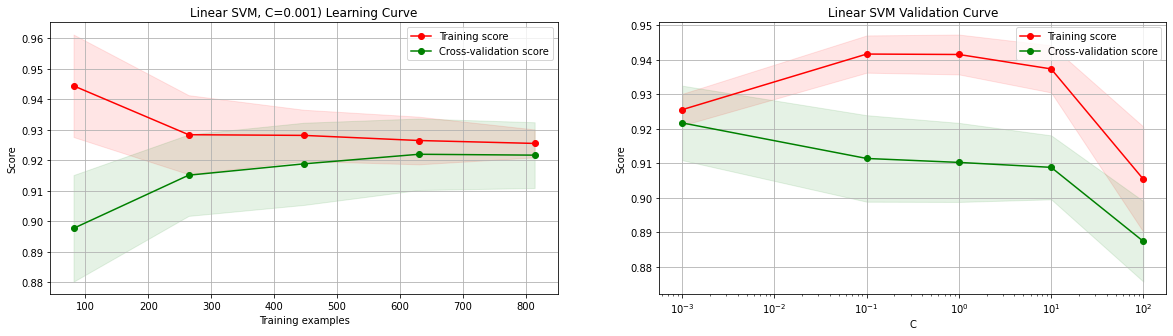

In [0]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
title = f"Linear SVM, C={svc_estimator.C})"
plot_learning_curve(svc_estimator, title, X, y, ax=ax1, cv=cv)
plot_validation_curve(svc_estimator, "Linear SVM", X, y, ax=ax2, cv=cv, 
                      param_name="C", param_range=[0.001, 0.1, 1, 10, 100])
plt.show()

#3/ Logistic

In [0]:
from sklearn.linear_model import LogisticRegression
tuned_parameters = {
    'C': np.logspace(-3,3,7),
    'penalty':['l1','l2']# l1 lasso l2 ridge
}
log_estimator = best_estimator(LogisticRegression(), tuned_parameters,X,y,10)

Best score: 0.9183539640436192
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


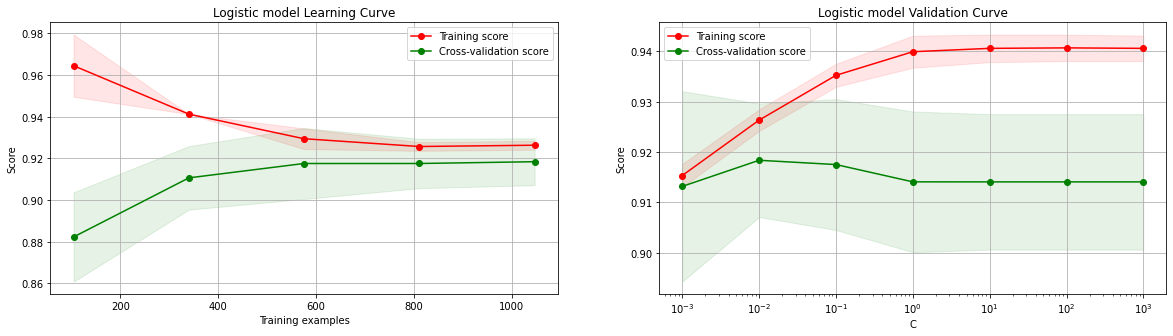

In [0]:
param_range = np.logspace(-3,3,7)
show_TV_curve(LogisticRegression(C=0.01),'Logistic model',X,y,'C',param_range,10)

#4/ Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
tuned_parameters = {
     'max_depth':np.arange(1,20)
}
dt_estimator = best_estimator(DecisionTreeClassifier(), tuned_parameters,X,y,5)

Best score: 0.8848453455675596
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


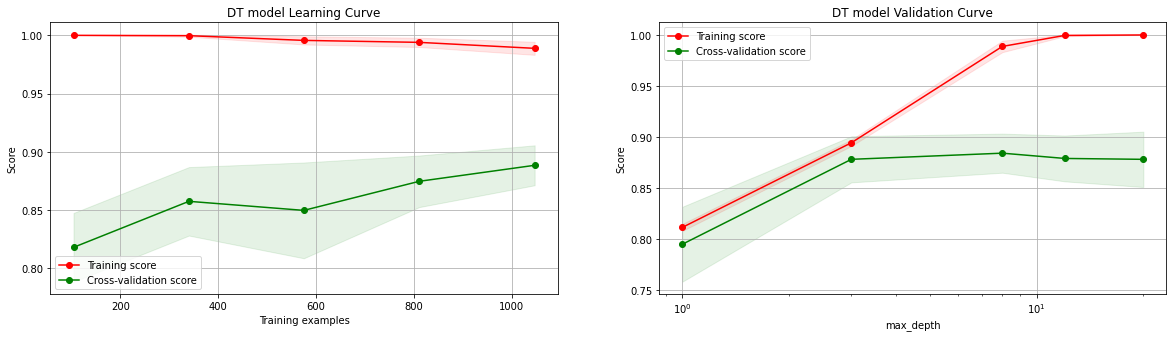

In [0]:
param_range = [1,3,8,12,20]
show_TV_curve(DecisionTreeClassifier(max_depth=8),'DT model',X,y,'max_depth',param_range,10)

From the validation curve we can see with max_depth in between 5-7, model has pretty good performance but by increasing the depth, the model becomes overfitting

# 5/ MLP

In [0]:
from sklearn.neural_network import MLPClassifier
tuned_parameters = {
    'hidden_layer_sizes': [(5,),(10,),(20,)]
}
mlp_estimator = best_estimator(MLPClassifier(max_iter=200), tuned_parameters,X,y,12)

Best score: 0.9158075601374572
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


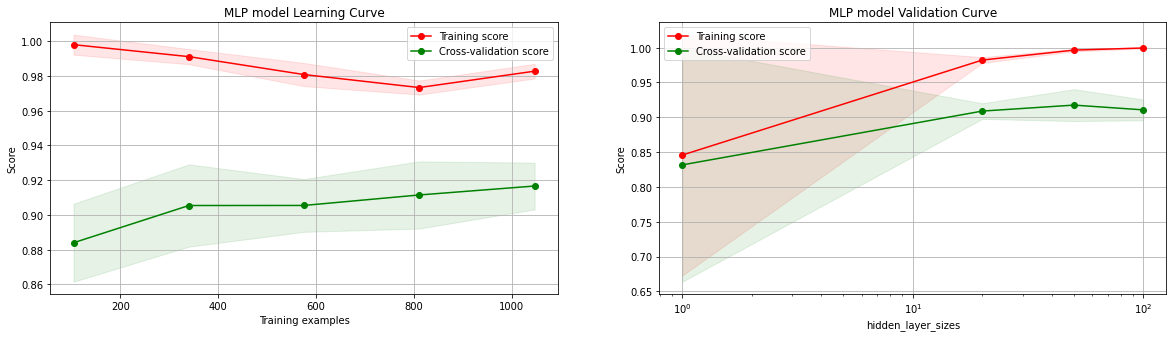

In [0]:
param_range = [1, 20, 50,100]
show_TV_curve(MLPClassifier(hidden_layer_sizes=20),'MLP model',X,y,'hidden_layer_sizes',param_range,10)

From the validation curve we can see with hidden_layer_sizes = 10, model has pretty good performance but by increasing the size, the model become overfitting

# Step 5: AUC curve

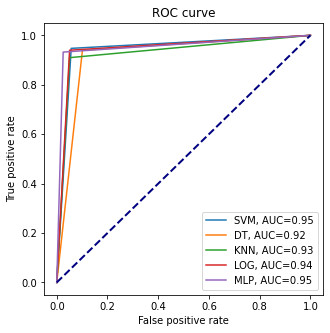

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics
def plot_roc_curve(estimators, titles, X, y, ax=None):
    if ax is None: _, ax = plt.subplots(figsize=(5, 5))

    for i, estimator in enumerate(estimators):
      y_pred = estimator.predict(X)
      fpr, tpr, _ = roc_curve(y, y_pred)
      ax.plot(fpr, tpr, label=f"{titles[i]}, AUC=" + "{:.2f}".format(metrics.auc(fpr, tpr)))

    ax.set_title('ROC curve')
    ax.legend(loc='best')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate') 
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    return plt

estimators = [svc_estimator,dt_estimator,knn_estimator,log_estimator,mlp_estimator]
titles = ['SVM','DT','KNN','LOG','MLP']
plot_roc_curve(estimators, titles, X_test, y_test)
plt.show()

SVM and MLP have the best AUC score 



# Step 6: Ensemble

By Voting

In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

eclf1 = VotingClassifier(voting='hard', 
 estimators=[('knn', knn_estimator), ('svc', svc_estimator), 
 ('log', log_estimator), ('dt', dt_estimator), ('mlp', mlp_estimator)] )

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    eclf1.fit(X, y)
    y_pred = eclf1.predict(X_test)
    print(f"Voting Accuracy Score = {accuracy_score(y_test, y_pred)}")
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    print(f"AUC Score = {metrics.auc(fpr, tpr)}")


Voting Accuracy Score = 0.9450171821305842
AUC Score = 0.9446083563338726


# Step 7: Apply AutoML

In [0]:
import sklearn
import autosklearn.classification
 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))
print(sklearn.metrics.classification_report(y_test, y_hat))

Accuracy score 0.9376299376299376
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       270
           1       0.93      0.92      0.93       211

    accuracy                           0.94       481
   macro avg       0.94      0.94      0.94       481
weighted avg       0.94      0.94      0.94       481

